### Calculate Label imbalance ratio 

##### Analyze correlation between label imbalance and Transfer_learning results

In [ ]:
import os
import sktime
from sktime.datasets import load_from_tsfile
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## most_frequent_label_bin = f_bin
### imbalance ratio = f_bin/(1-f_bin)

DATA_PATH = 'Multivariate_ts/'

dataset_lst = os.listdir(DATA_PATH)
imbal_lst = []

for i in range(len(dataset_lst)):
    data_num = i 
    ## Load_data
    data_name = dataset_lst[data_num]

    train_x, train_y = load_from_tsfile(
        os.path.join(DATA_PATH, "{}/{}_TRAIN.ts".format(data_name, data_name)), return_data_type="numpy3d")


    cats = list(np.unique(train_y))
    x = train_y
    tot_len = train_y.shape[0]
    max_count = 0

    for cat in cats:
        count = np.count_nonzero(x == cat)
        if max_count < count:
            max_count = count

    max_prop = max_count / tot_len
    imbal_ratio = max_prop / (1-max_prop)
    imbal_lst.append([data_num, data_name,imbal_ratio])

c:\Users\hankk\Miniconda3\envs\py38\lib\site-packages\sktime\datasets\_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
c:\Users\hankk\Miniconda3\envs\py38\lib\site-packages\sktime\datasets\_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
c:\Users\hankk\Miniconda3\envs\py38\lib\site-packages\sktime\datasets\_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [3]:
## most_frequent_label_bin = f_bin
### imbalance ratio = f_bin/(1-f_bin)
data_name = 'Target_dataset'

with open('../Data/data_no_std.pkl', 'rb') as f:
    dataset = pickle.load(f)

train_X = dataset[0]
test_X = dataset[1]
train_y = dataset[2]
test_y = dataset[3]

cats = list(np.unique(train_y))
x = train_y
tot_len = train_y.shape[0]
max_count = 0

for cat in cats:
    count = np.count_nonzero(x == cat)
    if max_count < count:
        max_count = count

max_prop = max_count / tot_len
imbal_ratio = max_prop / (1-max_prop)
imbal_lst.append([data_num, data_name,imbal_ratio])
imbal_lst

[[0, 'ArticularyWordRecognition', 0.04166666666666667],
 [1, 'AtrialFibrillation', 0.49999999999999994],
 [2, 'BasicMotions', 0.3333333333333333],
 [3, 'Cricket', 0.09090909090909091],
 [4, 'EigenWorms', 0.7534246575342466],
 [5, 'Epilepsy', 0.37],
 [6, 'ERing', 0.19999999999999998],
 [7, 'EthanolConcentration', 0.3384615384615385],
 [8, 'FaceDetection', 1.0],
 [9, 'FingerMovements', 1.0127388535031847],
 [10, 'HandMovementDirection', 0.3333333333333333],
 [11, 'Handwriting', 0.07913669064748202],
 [12, 'Heartbeat', 2.5789473684210527],
 [13, 'LSST', 0.461950059453032],
 [14, 'MotorImagery', 1.0],
 [15, 'NATOPS', 0.19999999999999998],
 [16, 'PEMS-SF', 0.19730941704035873],
 [17, 'PenDigits', 0.1161751563896336],
 [18, 'PhonemeSpectra', 0.02631578947368421],
 [19, 'RacketSports', 0.3981481481481482],
 [20, 'SelfRegulationSCP1', 1.0150375939849623],
 [21, 'SelfRegulationSCP2', 1.0],
 [22, 'StandWalkJump', 0.49999999999999994],
 [23, 'UWaveGestureLibrary', 0.14285714285714285],
 [23, 'Tar

In [4]:
df = pd.read_csv('transfer_results.csv', index_col = 0)
df

,precision,accuracy,recall,f1,Type,Dist,label_imbalance,NumClasses
ArticularyWordRecognition,24.393064,5.588994,21.955443,23.110201,Motion,2.061423e+03,0.041667,25
AtrialFibrillation,27.954044,5.588994,26.686260,27.322629,ECG,4.338804e+03,0.500000,3
BasicMotions,22.569364,5.245056,22.798265,22.738421,HAR,1.686646e+03,0.333333,4
Cricket,26.692973,4.729149,21.900103,24.092332,HAR,5.931830e+03,0.090909,12
EigenWorms,25.991172,4.987102,23.505342,24.686117,Motion,1.000000e+12,0.753425,5
Epilepsy,22.322860,4.987102,30.441911,26.508643,HAR,2.462124e+03,0.370000,4
ERing,24.350144,5.417025,26.812991,25.700532,HAR,1.389167e+03,0.200000,6
EthanolConcentration,29.066787,5.503009,29.935164,29.583355,Other,1.000000e+12,0.338462,4
FaceDetection,29.186164,5.503009,22.945313,25.765608,EEG,1.357222e+03,1.000000,2
FingerMovements,23.394880,5.159071,17.835367,20.335116,EEG,1.249310e+03,1.012739,2


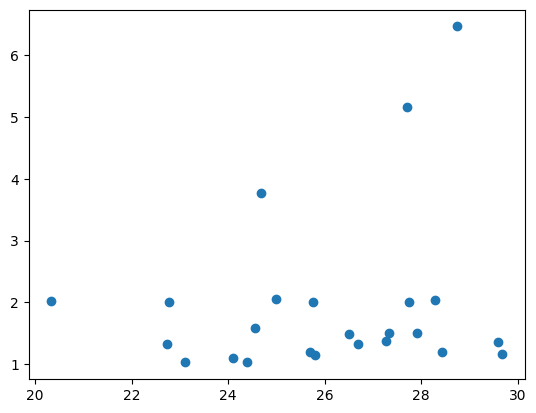

In [5]:
plt.scatter(df.f1 , df.label_imbalance*df.NumClasses)

<AxesSubplot: xlabel='f1', ylabel='Dist'>

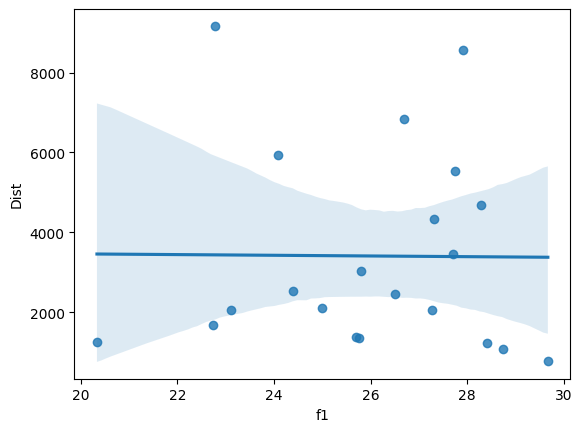

In [6]:
# sns.regplot(x = 'f1', y = 'label_imbalance', data = df)
df2 = df[df['Dist']<999999]
# df2['new'] = df.label_imbalance*df.NumClasses
sns.regplot(x = 'f1', y = 'Dist', data = df2)

In [7]:
target_compare = df.loc[:, ['f1', 'label_imbalance']]

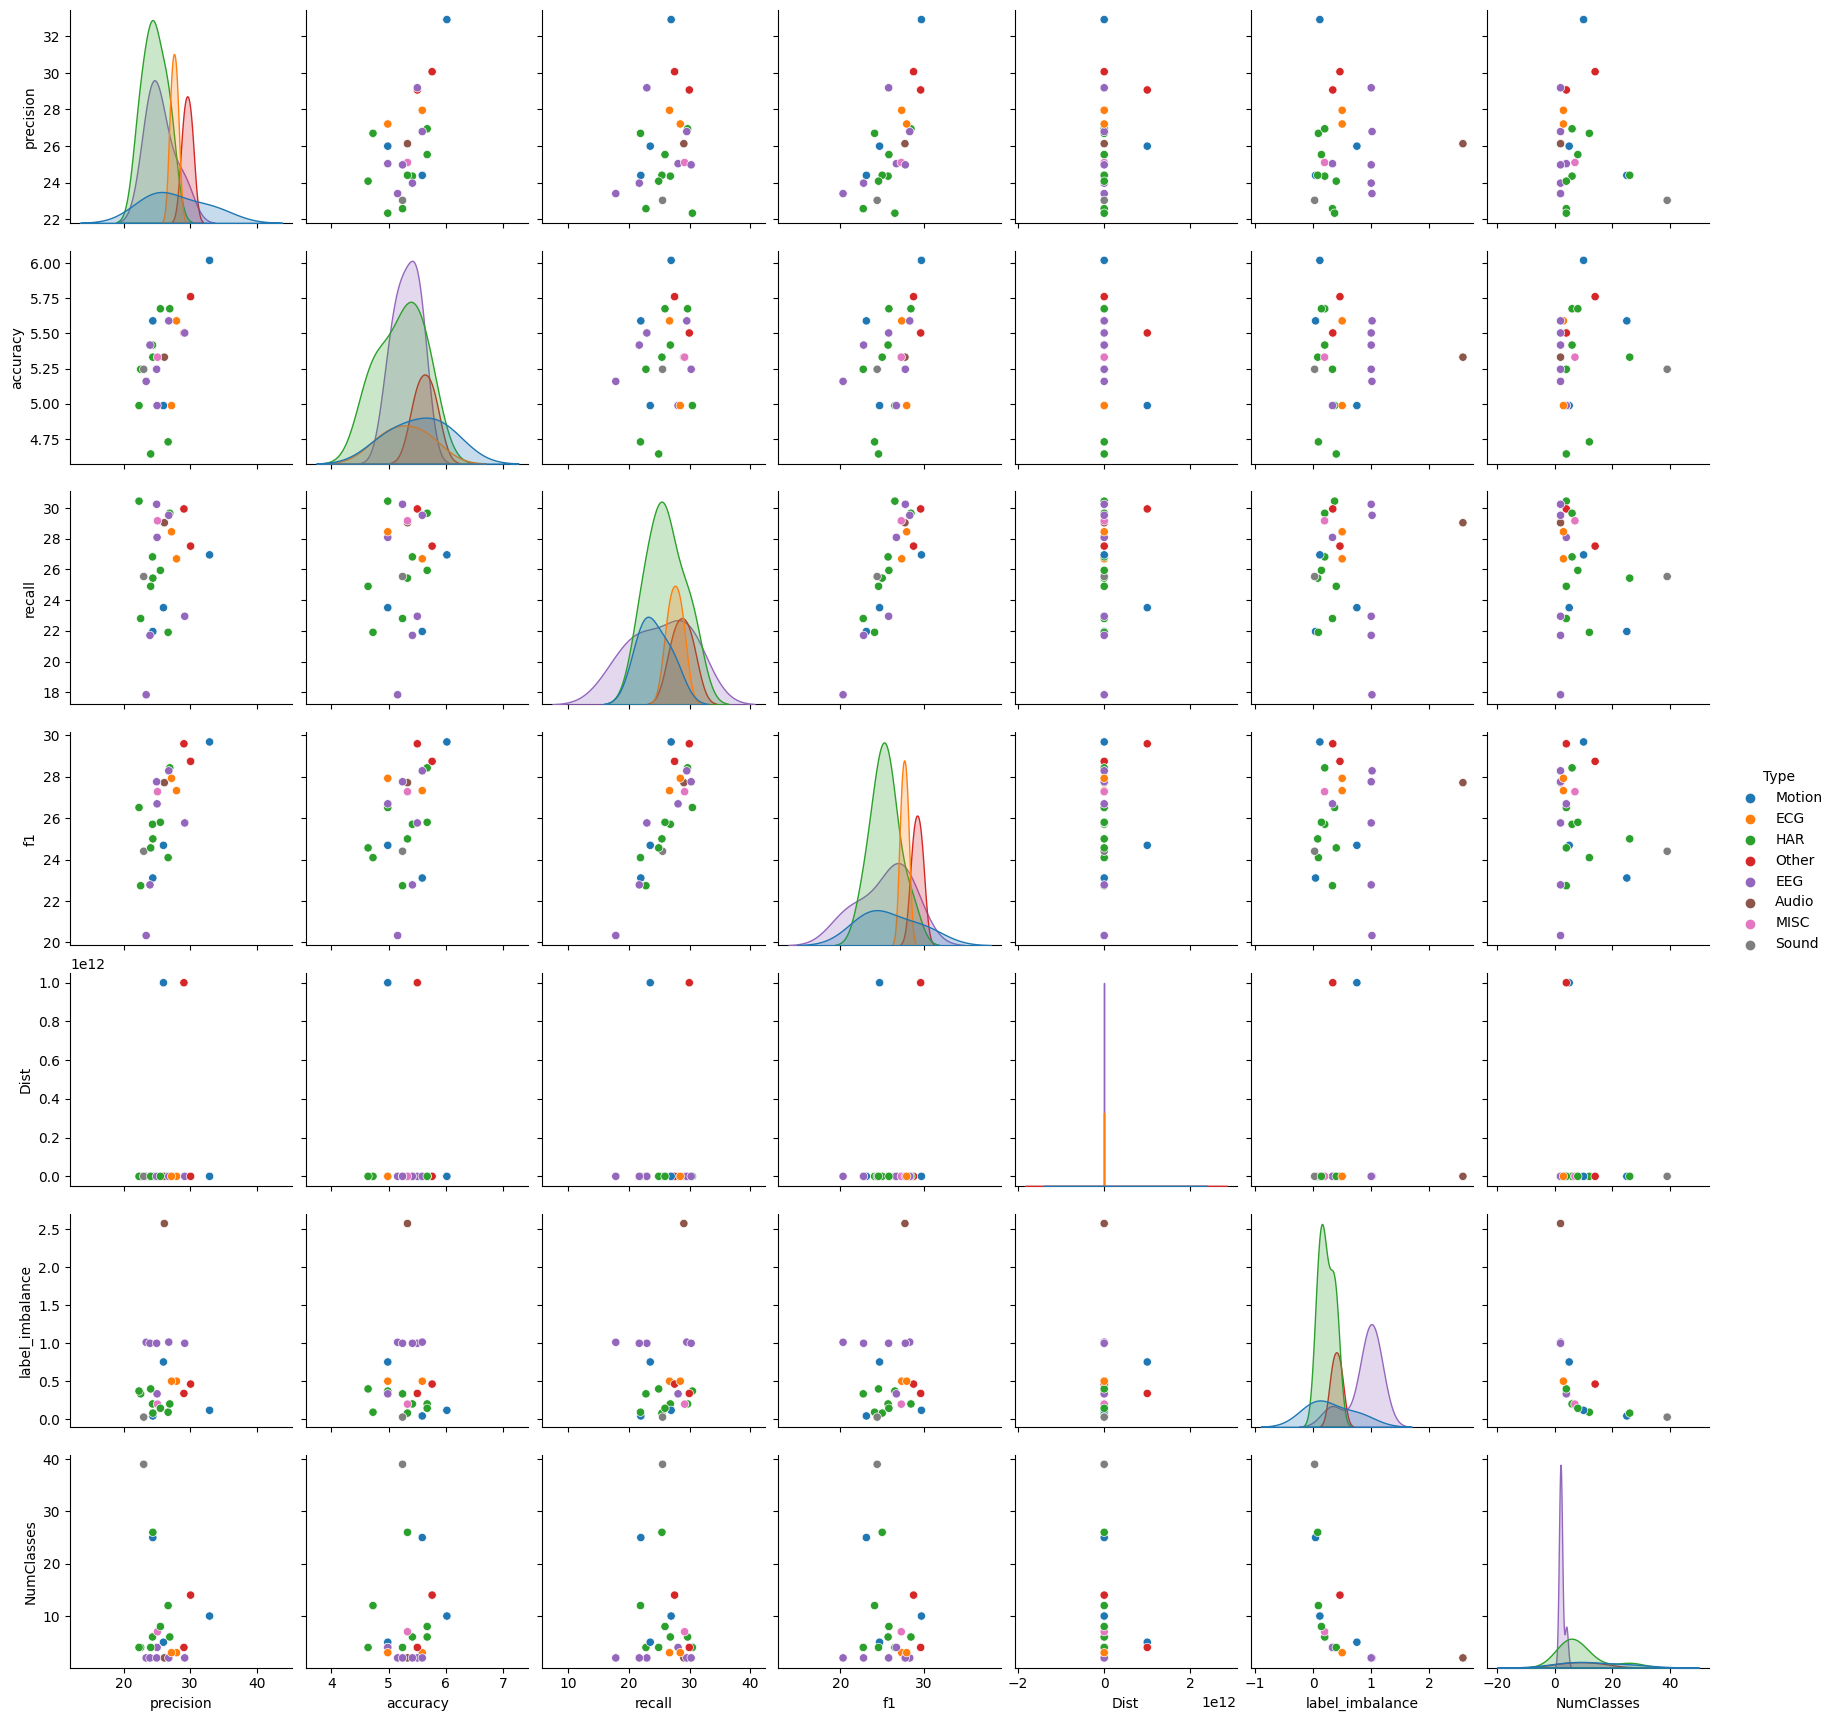

In [8]:
sns.pairplot(df, hue = 'Type')